In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 

In [2]:
data = pd.read_csv('student_evaluation.csv')

In [3]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
data.shape

(5820, 33)

In [5]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [9]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
kmeans = KMeans(n_clusters = 2)

In [11]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
pred = kmeans.predict(data)

In [14]:
pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [15]:
pd.Series(pred).value_counts()

1    3150
0    2670
dtype: int64

In [16]:
kmeans.inertia_

231353.76351703226

In [17]:
kmeans.score(data)

-231353.7635170321

In [18]:
SSE = []

In [20]:
for cluster in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

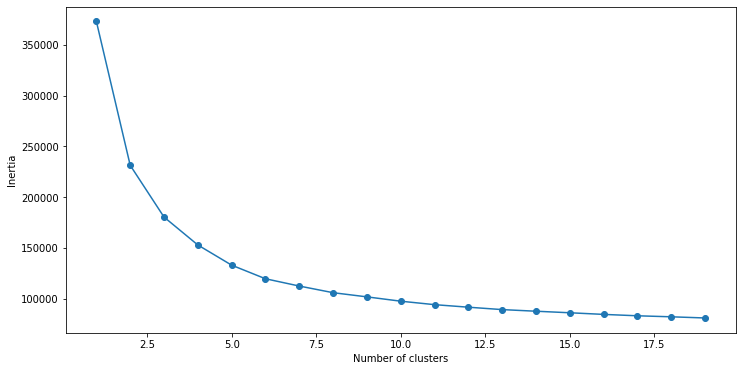

In [22]:
frame = pd.DataFrame({"Cluster": range(1, 20), 'SSE':SSE})
plt.figure(figsize= (12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
data_scaled = scaler.fit_transform(data)

In [26]:
pd.DataFrame(data_scaled).describe

<bound method NDFrame.describe of            0         1         2         3         4         5         6   \
0    -2.06785 -1.430719 -0.402174 -1.136118  0.901862  0.052278 -0.057490   
1    -2.06785 -1.430719 -0.402174 -0.458082  0.160501  0.052278 -0.057490   
2    -2.06785 -1.430719 -0.402174  0.219954  0.901862  1.543745  1.498760   
3    -2.06785 -1.430719 -0.402174 -0.458082  0.160501  0.052278 -0.057490   
4    -2.06785 -1.430719 -0.402174 -1.136118 -1.322221 -1.439189 -1.613740   
...       ...       ...       ...       ...       ...       ...       ...   
5815  0.71607  1.552042 -0.402174 -1.136118 -1.322221 -1.439189 -1.613740   
5816  0.71607  1.552042 -0.402174  0.897990  0.901862  0.798012  0.720635   
5817  0.71607  1.552042 -0.402174 -1.136118  0.901862  1.543745  1.498760   
5818  0.71607  1.552042 -0.402174 -0.458082 -0.580860 -1.439189 -1.613740   
5819  0.71607  1.552042 -0.402174 -0.458082 -0.580860 -1.439189 -1.613740   

            7         8         9   ...  

In [38]:
SSE_scaled=[]

In [39]:
for cluster in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

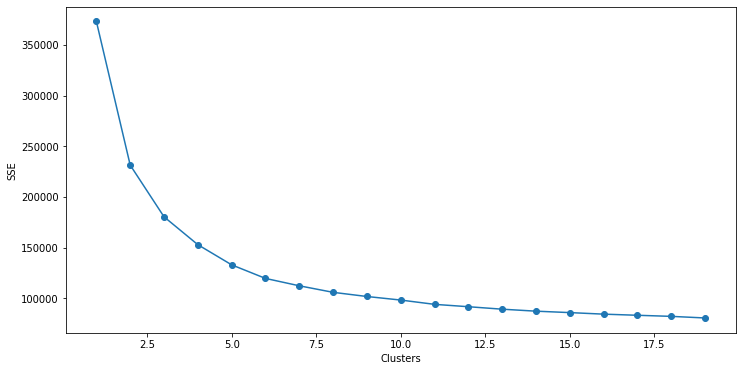

In [40]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")  
plt.ylabel("SSE")

In [42]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4)

In [43]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
pred = kmeans.predict(data_scaled)

In [45]:
pred

array([1, 1, 3, ..., 3, 0, 0], dtype=int32)

In [46]:
frame = pd.DataFrame(data_scaled)

In [47]:
frame['Cluster'] = pred

In [48]:
frame['Cluster'].value_counts()

1    2101
2    1665
0    1197
3     857
Name: Cluster, dtype: int64

In [49]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,Cluster
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,3
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,0
